<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/04_classification/05_introduction_to_image_classification/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [2]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Image Classification

We have learned about binary and multiclass classification, and we've done so using datasets consisting of feature columns that contain numeric and string values. The numbers could be continuous or categorical. The strings we have used so far were all categorical features.

In this lab we will perform another type of classification: **image classification**.

Image classification can be binary: "*Is this an image of a dog?*"  
It can also be multiclass: "*Is this an image of a cat, dog, horse, or cow?*"

The questions above assume there is only one item in an image. There is an even more advanced form of multiclass classification that answers the following question: What are all of the classes in an image and where are they located? For example: "*Where are all of the cats, dogs, horses, and cows in this image?*".

In this introduction to image classification, we'll focus on classification where there is only one item depicted in each image. In future labs we'll learn about the more advanced forms of image classification.


## The Dataset

The dataset we'll use for this Colab is the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70,000 grayscale images labeled with one of ten categories.

The categories are:

Label	| Class
------|------------
0     | T-shirt/top
1     | Trouser
2     | Pullover
3     | Dress
4     | Coat
5     | Sandal
6     | Shirt
7     | Sneaker
8     | Bag
9     | Ankle boot


The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


### Load the Data

Now that we have a rough understanding of the data we're going to use in our model, let's load the data into this lab. The Fashion MNIST dataset is conveniently available from the [Keras Datasets repository](https://keras.io/datasets/) along with a [utility function](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) for downloading and loading the data into NumPy arrays.

In the code cell below, we import TensorFlow and download the Fashion-MNIST data.

In [3]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


`load_data()` returns two tuples, one for the training dataset and the other for the testing dataset. As you can see from the output of the code cell above, we have `60,000` training samples and `10,000` testing samples. This makes for a `14%` holdout of the data.

You might be wondering what that `28, 28` is in the image data. That is a two-dimensional representation of the image. This is our feature data. Each pixel of the image is a feature. A `28` by `28` image has `784` pixels.

As you can see, even a tiny image generates quite a few features. If we were processing 4k-resolution images, which are often `3840` by `2160` pixels, then we would have `8,294,400` features! Over eight million features is quite a bit. In later labs we'll address some strategies for working with this massive amount of data.

### Exploratory Data Analysis

It is always a good idea to look at your data before diving in to building your model. Remember that our data is divided across four NumPy arrays, two of which are three-dimensional arrays:

In [4]:

print('Training images:', train_images.shape)
print('Training labels:', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


To make our exploration tasks a little easier, let's put the data into a Pandas `DataFrame`. One way to do this is to flatten the `28` by `28` image into a flat array of `784` pixels, with the pixel number being the column name. We then add the labels to a `target` column.

In [5]:
import numpy as np
import pandas as pd

train_df = pd.DataFrame(
    np.array([x.flatten() for x in train_images]),
    columns=[i for i in range(784)]
)
train_df['target'] = train_labels

train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883,4.500000
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,9.000000


With so many columns, reading the output of `describe()` is nearly impossible. Let's instead do our analysis a little differently.

To begin, we will find the minimum value of every pixel column and output the sorted list of unique values.

In [6]:
FEATURES = train_df.columns[:-1]

sorted(train_df.loc[:, FEATURES].min().unique())

[0]

All of the values were `0`.

Let's do the same for the maximum values.

In [7]:
sorted(train_df.loc[:, FEATURES].max().unique())

[16,
 36,
 83,
 105,
 119,
 164,
 167,
 170,
 180,
 188,
 189,
 202,
 206,
 211,
 212,
 219,
 221,
 224,
 225,
 227,
 230,
 232,
 233,
 235,
 237,
 239,
 242,
 243,
 244,
 245,
 247,
 249,
 250,
 251,
 252,
 253,
 254,
 255]

That is more interesting. We seem to have values ranging from `16` through `255`. These values represent color intensities for grayscale images. `0`, which we saw as a minimum value, maps to black in the color map that we will use, while `255` is white.

Let's see a histogram distribution of our max pixel values.

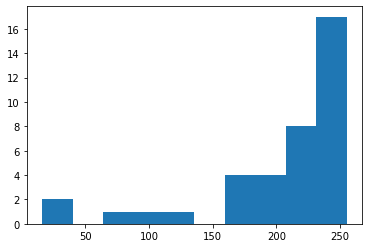

In [8]:
import matplotlib.pyplot as plt

_ = plt.hist(train_df.loc[:, FEATURES].max().unique())

Unsurprisingly, higher intensity values seem to be more prevalent as maximum pixel values than lower intensity values.

#### Exercise 1: Charting Pixel Intensities

In the example above, we created a histogram containing the maximum pixel intensities. In this exercise you will create a histogram for all pixel intensities in the training dataset.

If some intensities are outliers, remove them to get a more meaningful histogram.

Hint: The NumPy [`where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) and [`flatten`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html) can come in handy for this exercise. 

##### **Student Solution**

In [9]:
train_df.loc[FEATURES]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0,0,0,0,0,0,0,1,0,...,0,0,0,139,163,58,0,0,0,6
780,0,0,0,0,0,0,0,3,1,0,...,19,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,38,72,75,91,...,0,0,0,0,0,0,9,0,0,6
782,0,0,0,0,0,0,0,0,3,113,...,3,0,0,0,0,0,0,0,0,1


(array([25790964.,  1344502.,  1582733.,  1643562.,  1876736.,  2034790.,
         2606932.,  3303752.,  4306392.,  2549637.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

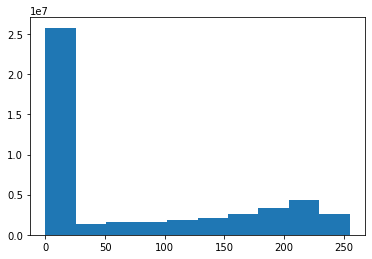

In [10]:
inten = train_df.loc[:, FEATURES].to_numpy().flatten()
plt.hist(inten)

---

#### Continuing on With EDA

Now that we have a basic idea of the values in our dataset, let's see if any are missing.

In [11]:

train_df.isna().any().any()
#train_df.isna().any().any()

False

Good. We now know we aren't missing any values, and our pixel values range from `0` through `255`.

Let's now see if our target values are what we expect.

In [12]:
sorted(train_df['target'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Let's see the distribution.

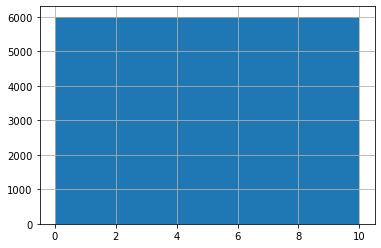

In [13]:
_ = train_df['target'].hist(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

The class types seem evenly distributed. We have `6,000` of each.

The numeric values should map to these clothing types:

Label	| Class
------|------------
0     | T-shirt/top
1     | Trouser
2     | Pullover
3     | Dress
4     | Coat
5     | Sandal
6     | Shirt
7     | Sneaker
8     | Bag
9     | Ankle boot

We can spot check this by looking at some of the images. Let's check a random 'T-shirt/top'.

To do this we select a random index from the 'T-shirt/top' items (`target = 0`). We then reshape the pixel columns back into a `28` by `28` two-dimensional array, which are the dimensions of the image. We then use `imshow()` to display the image.

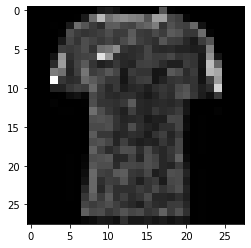

In [14]:
index = np.random.choice(train_df[train_df['target'] == 0].index.values)

pixels = train_df.loc[index, FEATURES].to_numpy().reshape(28, 28)

_ = plt.imshow(pixels, cmap='gray')

In our sample we got an image that looked like a very low resolution t-shirt. You should see the same. Note: every time you rerun the above cell, a new random index will be chosen, so feel free to cycle through some of the values to see the different types of t-shirt/top images included in the dataset.

This single image spot checking is okay, but it doesn't scale well.

We can view multiple images at a time using the [`GridSpec`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) class from Matplotlib.

In the code below, we build a visualization with a `10` by `10` grid of images in our t-shirt class.

The code imports `gridspec`, sets the number of rows and columns, and then sets the figure size so the image is large enough for us to actually see different samples.

After that bit of setup, we create a `10` by `10` `GridSpec`. The other parameters to the constructor are there to ensure the images are tightly packed into the grid. Try experimenting with some other values.

Next we randomly choose `100` indexes from items labelled with class `0` our training data.

The remainder of the code should look pretty familiar. We used similar code above to show a single image. The difference in this code is that we are adding `100` subplots using the `GridSpec`.

Label	| Class
------|------------
0     | T-shirt/top
1     | Trouser
2     | Pullover
3     | Dress
4     | Coat
5     | Sandal
6     | Shirt
7     | Sneaker
8     | Bag
9     | Ankle boot

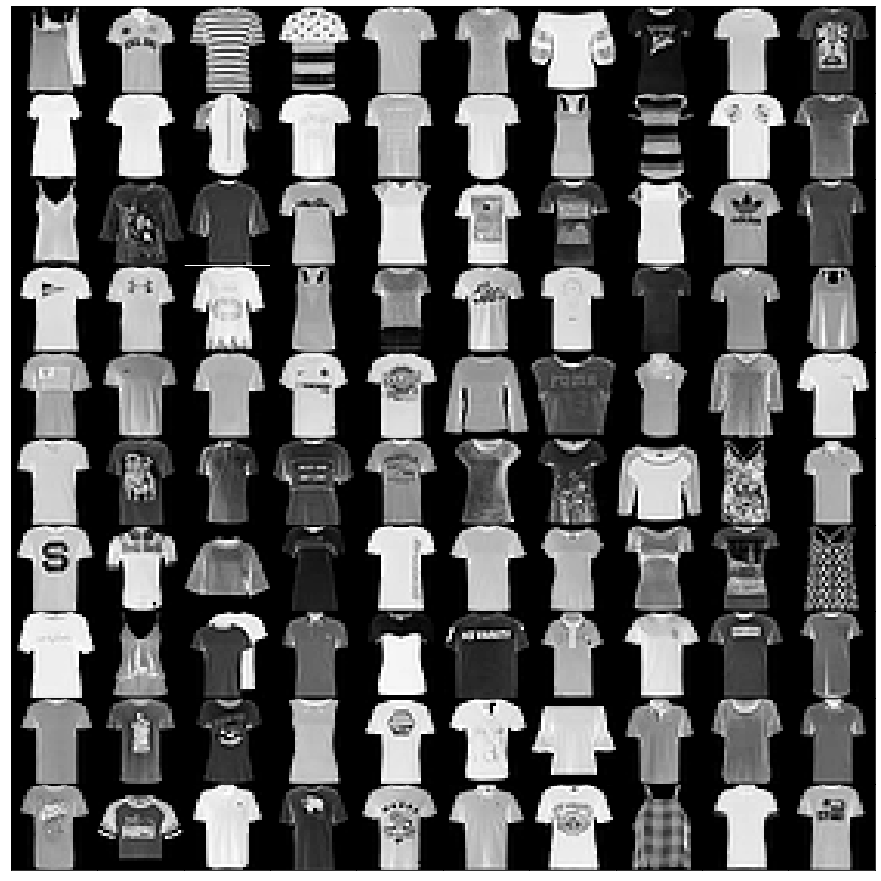

In [15]:
from matplotlib import gridspec

# Row and column count (100 samples)
rows = 10
cols = 10

# Size of the final output image
plt.figure(figsize=(12, 12)) 

# Grid that will be used to organize our samples
gspec = gridspec.GridSpec(
    rows,
    cols,
    wspace = 0.0,
    hspace = 0.0,
    top = 1.0,
    bottom = 0.0,
    left = 0.00, 
    right = 1.0,
) 

# Randomly choose a sample of t-shirts
T_SHIRTS = 0
indexes = np.random.choice(
    train_df[train_df['target'] == T_SHIRTS].index.values,
    rows*cols
)


# Add each sample to a plot using the GridSpec
cnt = 0
for r in range(rows):
  for c in range(cols):
    row = train_df.loc[indexes[cnt], FEATURES]
    img = row.to_numpy().reshape((28, 28))

    ax = plt.subplot(gspec[r, c])
    ax.imshow(img, cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    cnt = cnt + 1

plt.show()

#### Exercise 2: Visualizing Every Class

In this exercise, you'll take the code that we used above to visualize t-shirts and use it to visualize every class represented in our dataset. You'll need to print out the class name and then show a `10` by `10` grid of samples from that class. Try to minimize the amount of repeated code in your solution.

##### **Student Solution**

**Defining a function to pass in a particular class**

In [16]:
def function(classer):
    rows = 10
    cols = 10

    # Size of the final output image
    plt.figure(figsize=(12, 12)) 

    # Grid that will be used to organize our samples
    gspec = gridspec.GridSpec(
        rows,
        cols,
        wspace = 0.0,
        hspace = 0.0,
        top = 1.0,
        bottom = 0.0,
        left = 0.00, 
        right = 1.0,
    ) 

    # Randomly choose a sample of t-shirts

    indexes = np.random.choice(
        train_df[train_df['target'] == classer].index.values,
        rows*cols
    )
    cnt = 0
    for r in range(rows):
        for c in range(cols):
            row = train_df.loc[indexes[cnt], FEATURES]
            img = row.to_numpy().reshape((28, 28))
            ax = plt.subplot(gspec[r, c])
            ax.imshow(img, cmap='gray')
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            cnt = cnt + 1
    
    plt.show()


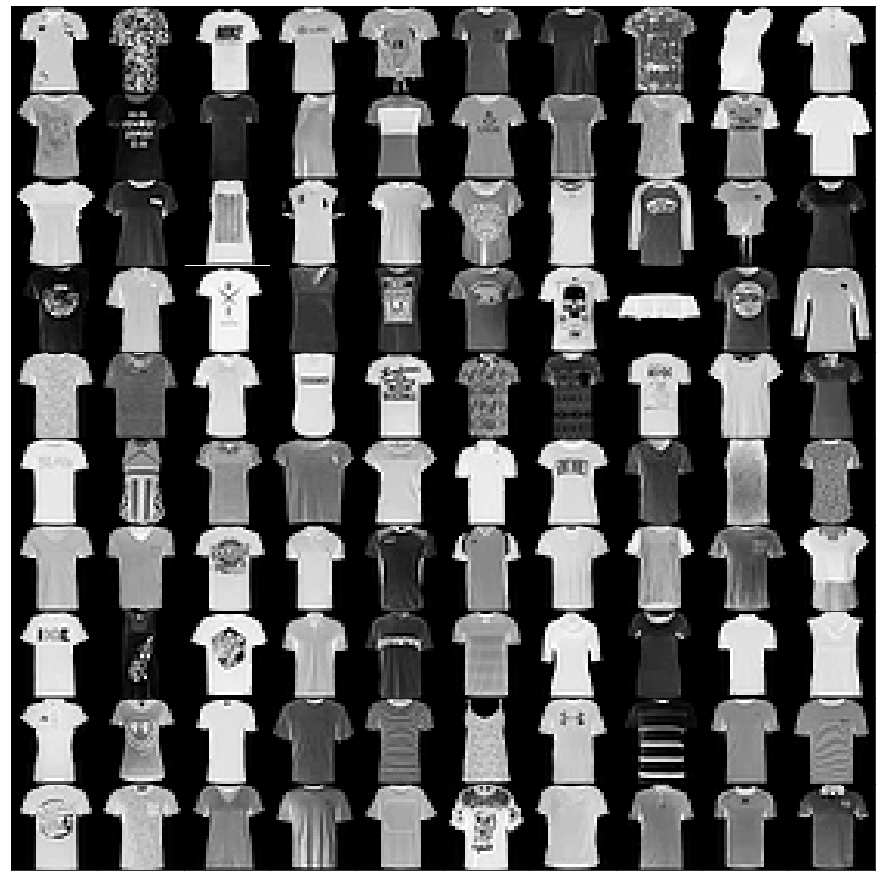

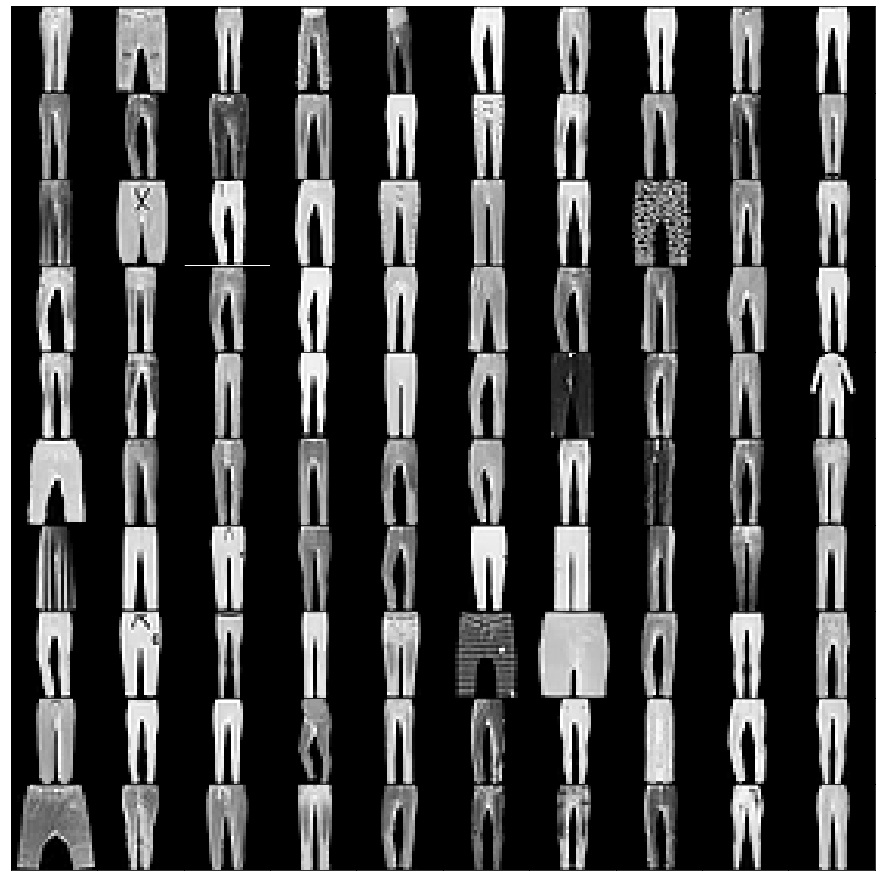

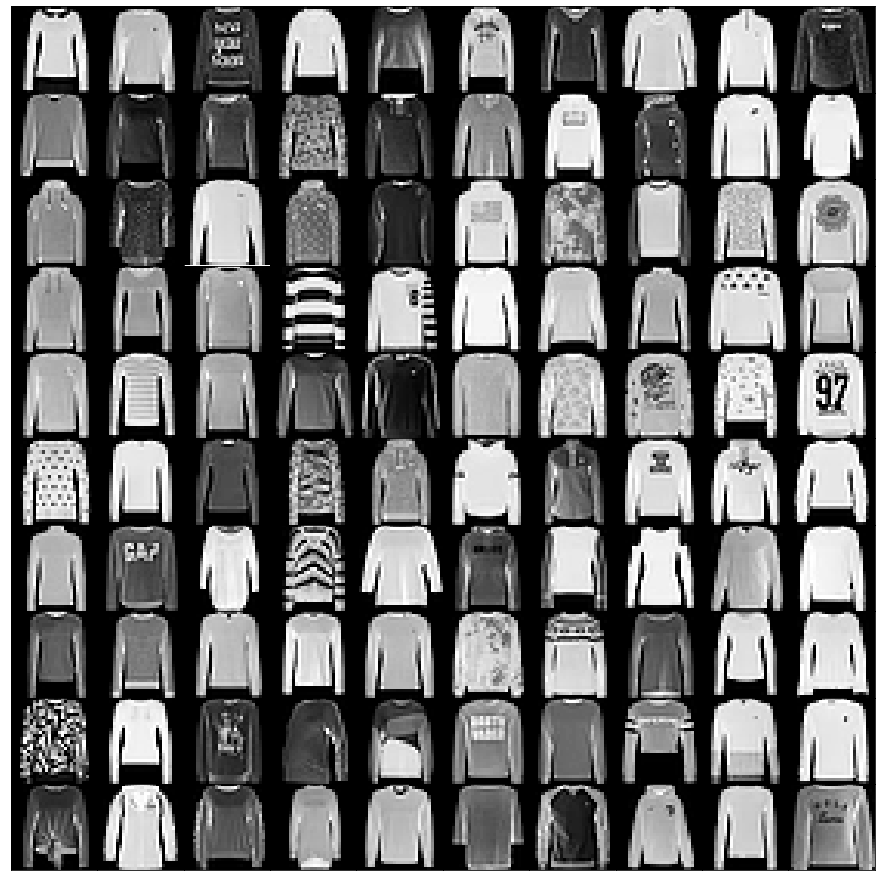

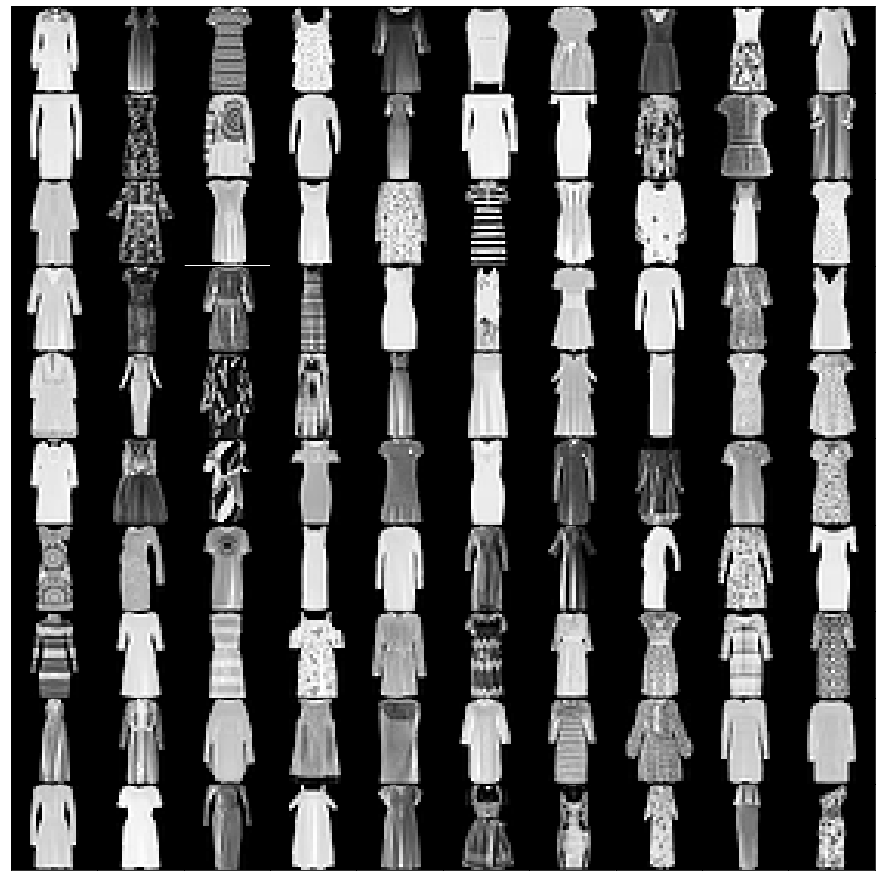

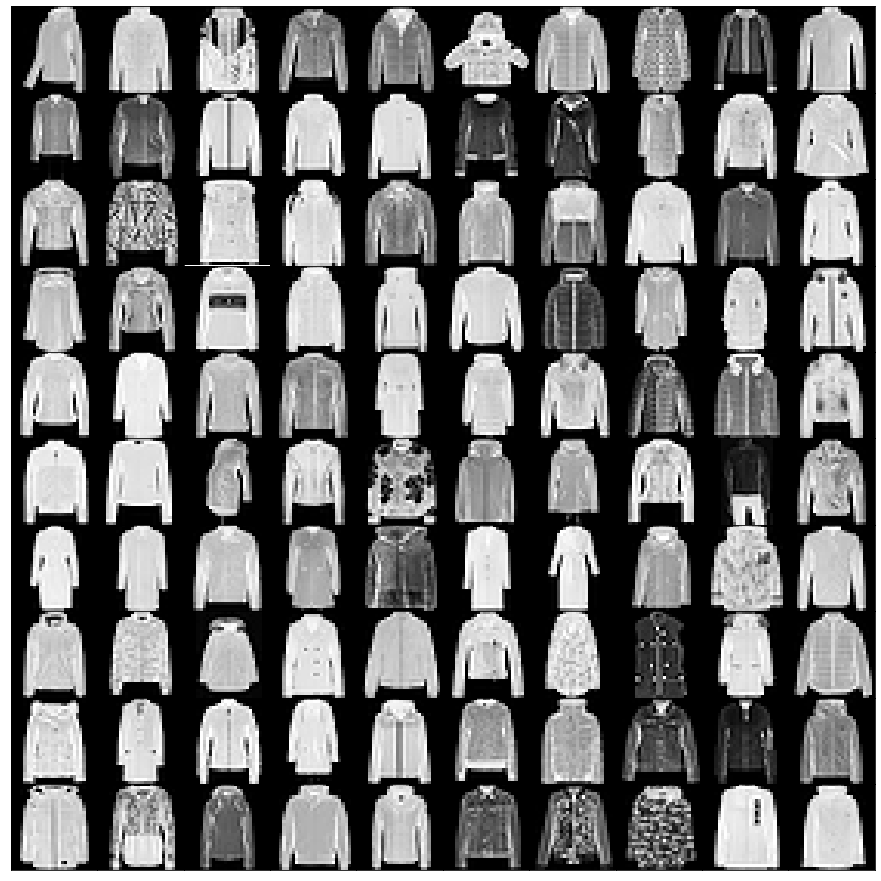

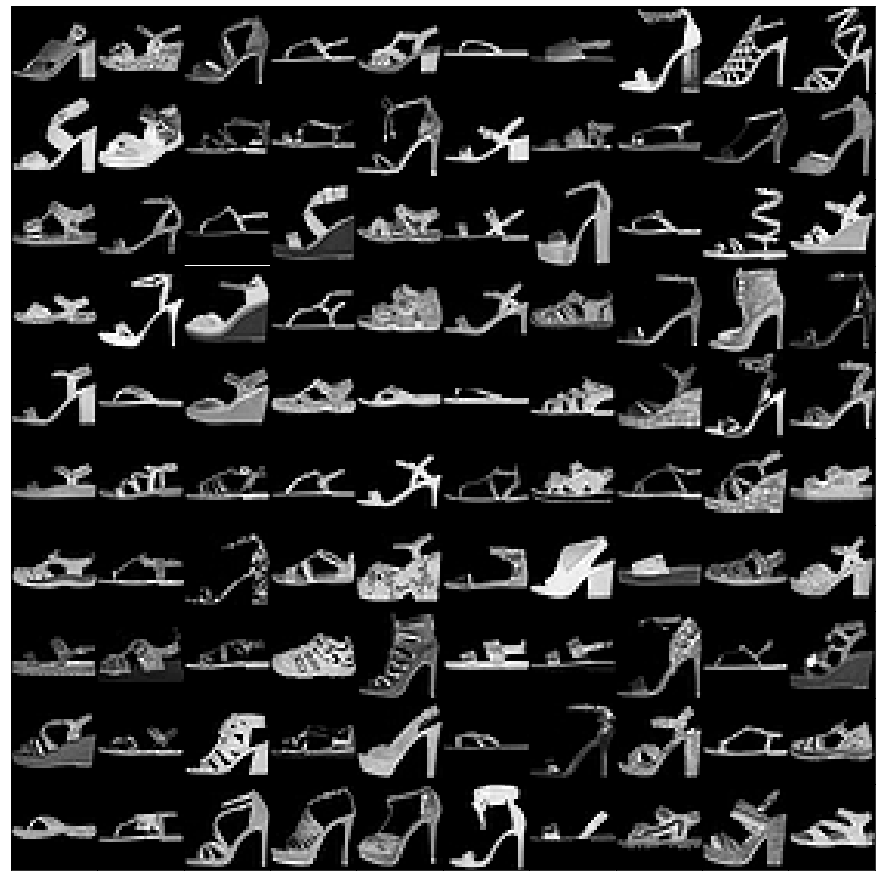

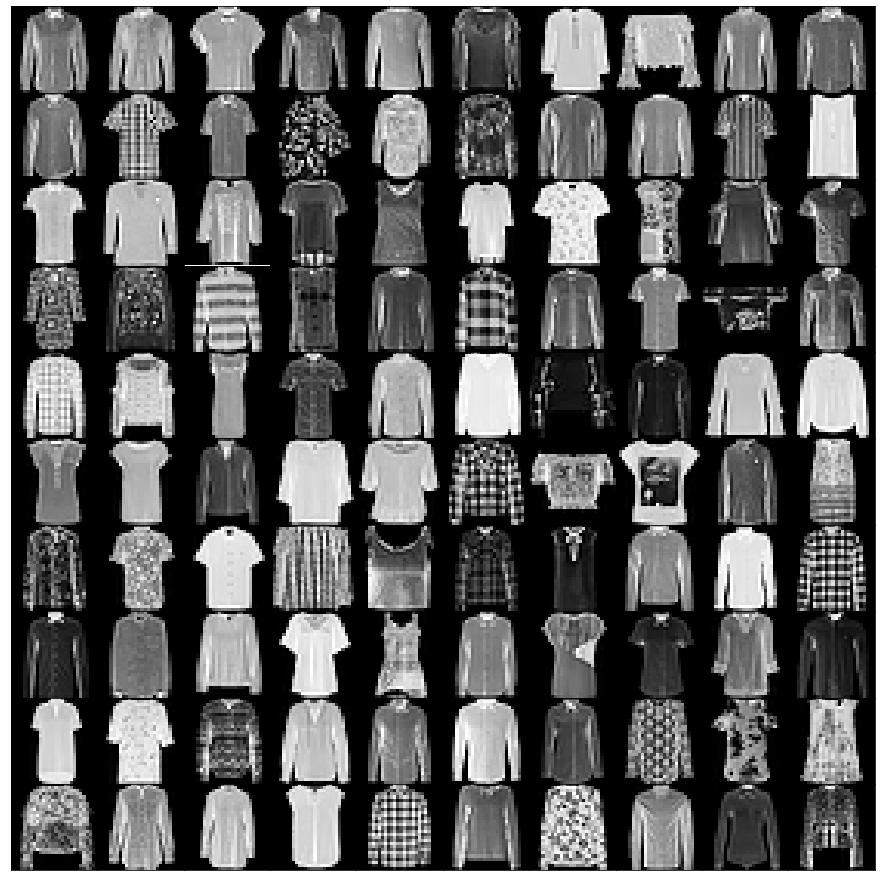

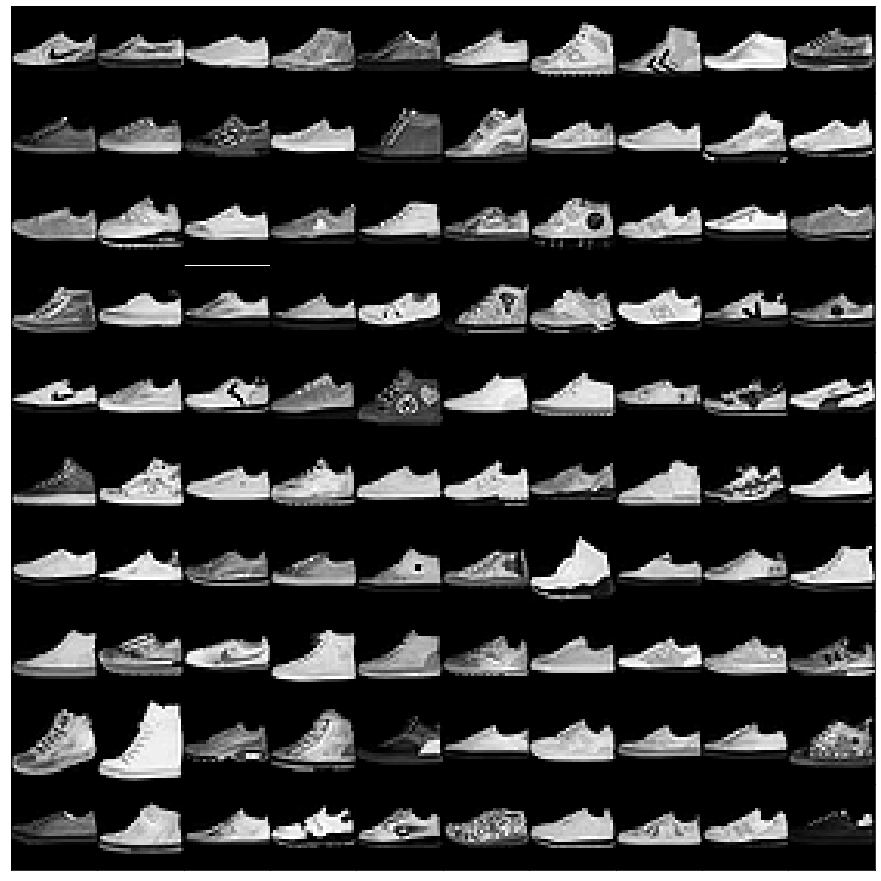

In [17]:
classes = [0,1,2,3,4,5,6,7]
for i in classes:
    function(i)

---

#### Wrapping Up EDA

From our visual analysis, our samples seem reasonable.

First off, class names seem to match pictures. This can give us some confidence that our data is labelled correctly.

Another nice thing is that all of the clothing items seem to be oriented in the same direction for the most part. If shoes were pointing in different directions, or if any images were rotated, then we would have had a lot more processing to do.

And finally, all of our images are the same dimensions and are encoded with a single numeric grayscale intensity. In the real world, you'll likely not get so lucky. Images are acquired in different sizes and with different color encodings. We'll get to some examples of this in future labs.

Based on our analysis so far, we can end our EDA and move on to model building.

## Modeling

We have many options for building a multiclass classification model for images. In this lab we will build a deep neural network using TensorFlow Keras.

### Preparing the Data

Our feature data is on a scale from `0` to `255`, and our target data is categorically encoded. Fortunately, all of the features are on the same scale, so we don't have to worry about standardizing scale. However, we'll need to do a little data preprocessing in order to get our data ready for modeling.

The first bit of data preprocessing we'll do is bring the feature values into the range of `0.0` and `1.0`. We could perform normalization to do this, but normalization actually isn't the only solution in this case.

We know that all of our features are pixel values in the range of `0` to `255`. We also know from our EDA that every feature has a minimum value of `0`, but that the max values have a pretty wide range. It is possible we would make our model worse by normalizing, since we'd be making the same values across pixels not map to the same color.

Instead of normalizing, we can just divide every feature by `255.0`. This keeps the relative values the same across pixels.

In [18]:
train_df[FEATURES] = train_df[FEATURES] / 255.0

train_df[FEATURES].describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000003,0.000023,0.000118,0.000407,0.000979,0.001626,0.003222,0.008724,0.022348,0.056606,...,0.135547,0.091014,0.065005,0.069929,0.089878,0.070262,0.033277,0.010613,0.003212,0.000278
std,0.000363,0.000977,0.003011,0.009851,0.016986,0.022853,0.032588,0.055693,0.093474,0.149822,...,0.225717,0.191692,0.164880,0.172201,0.203641,0.177152,0.115485,0.067681,0.035817,0.008141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.141176,0.466667,0.643137,0.878431,0.901961,0.866667,0.866667,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


#### Exercise 3: One-Hot Encoding

Our target values are categorical values in a column named `target`. In this exercise, you will one-hot encode the target values. Your code should:

1. Create ten new columns named `target_0` through `target_9`.
1. Create a variable called `TARGETS` that contains the `10` target column names.
1. `describe()` the ten new target column values to ensure that they have values between 0 and 1 and that the one-hot encoding looks evenly distributed.

##### **Student Solution**

**Getting one hot encoding dataframe**

In [19]:
from sklearn.preprocessing import OneHotEncoder



target_columns = ['target_0','target_1','target_2','target_3','target_4','target_5','target_6','target_7','target_8','target_9']
TARGETS = target_columns
key = ['target']
ohe = OneHotEncoder(sparse=False)


encodedTargets = ohe.fit_transform(train_df[['target']])
print(type(encodedTargets))


encodedTargets_df = pd.DataFrame(encodedTargets)
encodedTargets_df.columns =target_columns


<class 'numpy.ndarray'>


**Dropping Target Column**

In [20]:

train_df = train_df.drop('target',axis =1 )

train_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


---

**Combining DataFrames**

In [21]:

encodedTargets_df
train_df
frames = [train_df,encodedTargets_df]

train_df = train_df.join(encodedTargets_df)

train_df
#new_target_df = pd.merge(train_df,encodedTargets_df)

,0,1,2,3,4,5,6,7,8,9,...,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Configure and Compile the Model

We'll be relying on the TensorFlow Keras [`Sequential` model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) and [`Dense` layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) that we used in previous labs.

In this case our input shape needs to be the size of our feature count. We'll then add a few hidden layers and then use a softmax layer the same width as our target count. This layer should output the probability that a given set of input features maps to each of our targets. The sum of the probabilities will equal `1.0`.

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(len(FEATURES),)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(TARGETS), activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


2021-09-26 13:10:07.675669: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Note that our images are actually `28` by `28` images. We flattened the images when we loaded them into a dataframe for EDA. However, flattening outside of the model isn't necessary. TensorFlow works in many dimensions. If we wanted to keep our images as `28` by `28` matrices, we could have added a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer as shown below.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(TARGETS), activation=tf.nn.softmax)
])

model.summary()
```

```
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
=================================================================
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
```

This model results in the same number of trainable parameters as our pre-flattened model; it just saves us from having to flatten the images outside of TensorFlow.


Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* — This measures how well the model is doing during training. We want to minimize this function to "steer" the model in the right direction. A large loss would indicate the model is performing poorly in classification tasks, meaning it is not matching input images to the correct class names. (It might classify a boot as a coat, for example.)
* *Optimizer* — This is how the model is updated based on the data it sees and its loss function.
* *Metrics* — This is used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


## Train the Model

Training a Keras API neural network model to classify images looks just like all of the other Keras models we have worked with so far. We call this the `model.fit` method, passing it our training data and any other parameters we'd like to use.

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    train_df[FEATURES],
    train_df[TARGETS],
    epochs=500,
    callbacks=[callback]
)

Epoch 1/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1560 - accuracy: 0.9416
Epoch 2/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1503 - accuracy: 0.9427
Epoch 3/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1543 - accuracy: 0.9427
Epoch 4/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1499 - accuracy: 0.9423
Epoch 5/500
1875/1875 [==============================] - 2s 993us/step - loss: 0.1462 - accuracy: 0.9446
Epoch 6/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1504 - accuracy: 0.9435
Epoch 7/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1481 - accuracy: 0.9440
Epoch 8/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1468 - accuracy: 0.9445
Epoch 9/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1473 - accuracy: 0.9441
Epoch 10/500
1875/1875 [==============================] - 2s 1ms/step -

KeyboardInterrupt: 

As the model trains, the loss and accuracy metrics are displayed. We also store the progression in history.

You'll notice that this took longer to train per epoch than many of the models we've built previously in this course. That's because of the large number of features. Even with these tiny `28` by `28` grayscale images, we are still dealing with `784` features. This is orders of magnitude larger than the 10 or so features we are used to using.

### Exercise 4: Graph Model Progress

In this exercise you'll create two graphs. The first will show the model loss over each epoch. The second will show the model accuracy over each epoch. Feel free to use any graphical toolkit we have used so far.

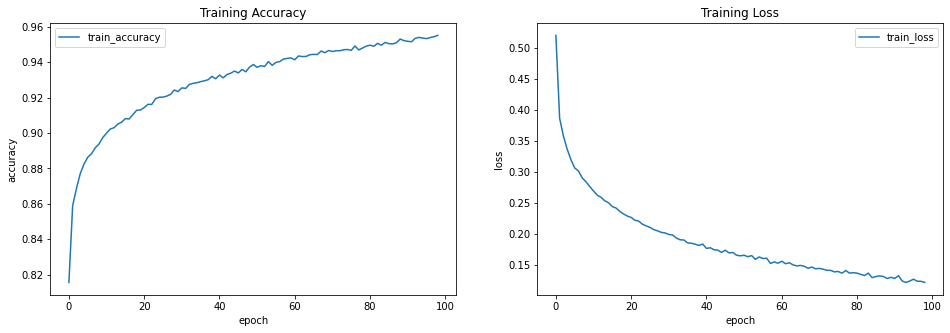

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')



---

## Evaluate the Model

Now that our model is trained, let's evaluate it using an independent test data set. Then let's see if the model quality holds up. We'll use `model.evaluate()` and pass in the test dataset. `model.evaluate()` returns a `test_loss` and `test_accuracy`.

Also note that we need to apply the same feature preprocessing to the test data that we did to the train data.

In [ ]:
test_df = pd.DataFrame(
    np.array([x.flatten() for x in test_images]),
    columns=[i for i in range(784)]
)
test_df['target'] = test_labels

test_df[FEATURES] = test_df[FEATURES] / 255.0

for class_i in sorted(test_df['target'].unique()):
  column_name = f'target_{class_i}'
  test_df[column_name] = (test_df['target'] == class_i).astype(int)

train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
(test_loss, test_accuracy) = model.evaluate(test_df[FEATURES], test_df[TARGETS])

print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.5598 - accuracy: 0.8761
Training loss: 0.12142243753870328
Training accuracy: 0.9551833
Test loss: 0.5598000788092613
Test accuracy: 0.8761


The accuracy on the test dataset is noticeably less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model tends to perform worse on new data than on the training data. The trained model is unable to **generalize** to data that it has not seen before.

There are many ways to try to reduce overfitting. One that we have seen is **early stopping**. This causes training to stop when loss stops changing significantly for a model. Without early stopping, the model would continue training, becoming more and more tailored to the training data and likely less to be able to generalize across new data.

Another method for reducing overfitting in deep neural networks is **dropout**. A dropout layer is a layer that sits between two regular layers (in our case, dense layers) and randomly sets some of the values passed between layers to `0`.

In TensorFlow the [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) class is capable of doing this. To use `Dropout` you simply add a `Dropout` layer between other layers of the model. Each dropout layer has a percentage of values that it will set to `0`.

```python
model = tf.keras.Sequential([
    ...
    tf.keras.layers.Dense(name='L14', 431, activation=tf.nn.relu),
    # Randomly sets 15% of values between L14 and L15 to 0
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(name='L15', 257, activation=tf.nn.relu),
    # Randomly sets 1% of values between L15 and L16 to 0
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(name='L16', 57, activation=tf.nn.relu),
    ...
])
```

### Exercise 5: Dropout Layers

In this exercise take the model from above and add a [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer or layers between the `Dense` layers. See if you can find a configuration that reduces the gap between the training loss and accuracy and the test loss and accuracy. Document your findings.

#### **Student Solution**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(len(FEATURES),)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(len(TARGETS), activation=tf.nn.softmax)
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)

model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    train_df[FEATURES],
    train_df[TARGETS],
    epochs=500,
    callbacks=[callback]
)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Iterate a few times and find a dropout model that seems to bring the testing and training numbers closer together. When you are done, document your findings in the table below. The **?**s are placeholders for accuracy and loss values.

Dropout (Y/N) | Train/Test | Accuracy | Loss
--------------|------------| ---------|------
N             | Train      | *.95*      | *.1*
N             | Test       | *.87*      | *.5*
Y             | Train      | *.89*      | *.28*
Y             | Test       | *.87*      | *.35*


---

In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
(test_loss, test_accuracy) = model.evaluate(test_df[FEATURES], test_df[TARGETS])

print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3501 - accuracy: 0.8751
Training loss: 0.2836518274118503
Training accuracy: 0.8952
Test loss: 0.3500618842363358
Test accuracy: 0.8751


## Make Predictions

We have now trained the model while trying to reduce overfitting. Let's say we're happy with our numbers and are ready to deploy the model. Now it is time to make predictions.

We could now snap an image of a clothing item, resize it to `28` by `28`, and grayscale it. But that is a lot of work and outside the scope of this class. For simplicity, let's use the test images as input to the model and see what predictions we get.

We'll use the `model.predict()` function to do this. Let's make our predictions and peek at the first result.

In [ ]:
predictions = model.predict(test_df[FEATURES])

predictions[0]

array([3.2000608e-10, 5.1018556e-12, 1.2096562e-09, 1.9276606e-11,
       2.5907356e-11, 1.1488260e-03, 9.3423907e-11, 3.7617382e-02,
       1.1600423e-09, 9.6123374e-01], dtype=float32)

What are those numbers?

For each image:
  * the prediction result is in the form of 10 numbers, one for each possible label
  * each number represents the level of confidence that a label is the correct label for the particular image
  * all 10 numbers should add up to the sum of 1

Let's see if that is true.

In [ ]:
sum(predictions[0]), sum(predictions[1])

(0.9999999455570759, 0.9999999934343045)

Well, maybe not `1`, but the result definitely approaches `1`. Floating point math makes summing to exactly `1` a little difficult.

Let's find out which label has the highest predicted number and whether it matches with the actual test label.

To find the highest predicted number we will use Numpy's [`argmax`](https://docs.scipy.org/doc/numpy-1.9.3/reference/generated/numpy.argmax.html) function which returns the index of the maximum value in an array.

In [ ]:
import numpy as np

print('Label with the highest confidence: {predicted_label}'.format(
    predicted_label = np.argmax(predictions[0])))

print('Actual label: {actual_label}'.format(actual_label = test_labels[0]))

Label with the highest confidence: 9
Actual label: 9


With our model the predicted class was class `9`, and the actual class was class `9`. Success!

### Exercise 6: Thresholds

When making our predictions, we blindly accepted the output of `argmax` without really understanding what `argmax` was doing.

`argmax` returns the index of the maximum value in an array. What if there are ties? What happens for a 10-element array that looks like:

```python
  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
```

In this case it is a virtual tie between all of the classes. `argmax` will return the first value in the case of a tie. This is problematic for a few reasons. In this case we clearly have little confidence in any class, yet an algorithm that relies on `argmax` would naively predict the first class.

For this exercise, discuss ways we can get around relying solely on `argmax`. Are there better ways of finding a prediction algorithm?

#### **Student Solution**

>*Argmax is good in cases where classes of labels are discrete and the numerical difference between these values are more apparent. This was was certaintly the case for the model used, where integer values such as 1 and 2 were used to classify certain labels. In cases where this is not apparent, more concrete algorithms that can sort these values and return a maximum value would be better to use*

---

## Exercise 7: MNIST Digits

Another popular MNIST dataset is the [digits dataset](https://en.wikipedia.org/wiki/MNIST_database). This dataset consists of images of labelled, hand-written digits ranging from `0` through `9`.

In this exercise you will build a model that predicts the class of MNIST digit images.

The dataset is part of scikit-learn.

In [ ]:
from sklearn import datasets

import pandas as pd

digits_bunch = datasets.load_digits()
digits = pd.DataFrame(digits_bunch.data)
digits['digit'] = digits_bunch.target

#targets
digits['digit']


#digits.describe()

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: digit, Length: 1797, dtype: int64

You will need to:

* Perform EDA on the data
* Choose a model (or models) to use to predict digits
* Perform any model-specific data manipulation
* Train the model and, if possible, visualize training progression
* Perform a final test of the model on holdout data

Use as many code and text cells as you need to. Explain your work.

### **Student Solution**

**EDA**

In [ ]:
FEATURES_2 = train_df.columns[:-1]

#finding target classifications
print(digits['digit'].unique())




#loading original dataframe
og_df = digits

og_df


[0 1 2 3 4 5 6 7 8 9]


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


---

In [ ]:
#One hot encoding

target_columns = ['target_0','target_1','target_2','target_3','target_4','target_5','target_6','target_7','target_8','target_9']
TARGETS = target_columns
ohe = OneHotEncoder(sparse=False)


encodedTargets = ohe.fit_transform(og_df[['digit']])

encodedTargets_df = pd.DataFrame(encodedTargets)
encodedTargets_df.columns =target_columns

og_df = og_df.drop('digit',axis =1 )

og_df = og_df.join(encodedTargets_df)


In [ ]:
og_df

,0,1,2,3,4,5,6,7,8,9,...,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    og_df[FEATURES_2],
    og_df[TARGETS],
    test_size=0.2,
random_state=180, shuffle=True)

train_df = X_train.join(y_train)
test_df = X_test.join(y_test)

**Building the Model**

**Training set**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(len(FEATURES_2),)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(len(TARGETS), activation=tf.nn.softmax)
])



model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'],
)



callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    train_df[FEATURES_2],
    train_df[TARGETS],
    epochs=500,
    callbacks=[callback]
)

Train on 1437 samples
Epoch 1/500
1437/1437 [==============================] - 1s 507us/sample - loss: 3.0616 - accuracy: 0.2262
Epoch 2/500
1437/1437 [==============================] - 0s 152us/sample - loss: 1.3810 - accuracy: 0.5463
Epoch 3/500
1437/1437 [==============================] - 0s 151us/sample - loss: 0.9188 - accuracy: 0.7119
Epoch 4/500
1437/1437 [==============================] - 0s 154us/sample - loss: 0.6370 - accuracy: 0.7989
Epoch 5/500
1437/1437 [==============================] - 0s 156us/sample - loss: 0.4558 - accuracy: 0.8497
Epoch 6/500
1437/1437 [==============================] - 0s 173us/sample - loss: 0.3616 - accuracy: 0.8817
Epoch 7/500
1437/1437 [==============================] - 0s 165us/sample - loss: 0.2692 - accuracy: 0.9172
Epoch 8/500
1437/1437 [==============================] - 0s 154us/sample - loss: 0.3099 - accuracy: 0.9005
Epoch 9/500
1437/1437 [==============================] - 0s 153us/sample - loss: 0.2069 - accuracy: 0.9318
Epoch 10/500
14

**Graphing Model Process**

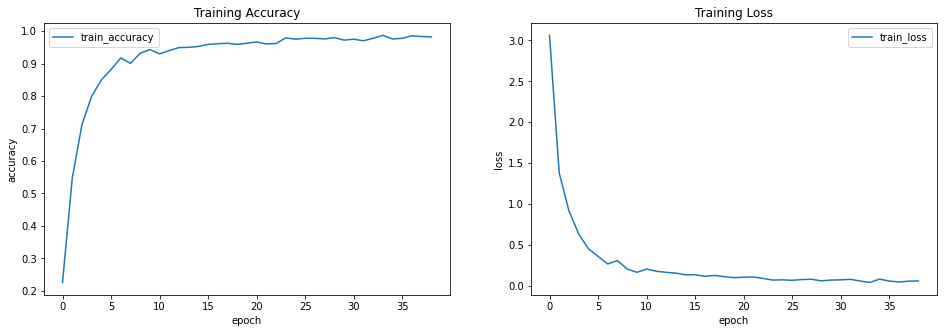

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

**Model Evaluation**

In [ ]:
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
(test_loss, test_accuracy) = model.evaluate(test_df[FEATURES_2], test_df[TARGETS])

print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

360/360 [==============================] - 0s 553us/sample - loss: 0.0862 - accuracy: 0.9861
Training loss: 0.061573891125997905
Training accuracy: 0.9819068
Test loss: 0.08623956021102559
Test accuracy: 0.9861111


In [ ]:
predictions = model.predict(test_df[FEATURES_2])

predictions[0]

array([1.6430340e-08, 3.3618651e-08, 3.1002009e-14, 1.9662133e-11,
       1.2574532e-08, 5.4443963e-11, 1.0000000e+00, 3.1500911e-14,
       1.1559946e-08, 1.5749539e-15], dtype=float32)